In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns   
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

#nltk.download('stopwords')
#nltk.download('wordnet')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

##Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve   
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [4]:
df_train = pd.read_csv('train.txt', delimiter=';', names= ['text', 'label'])
#df_train.columns = ['text', 'label'] 
df_val = pd.read_csv('val.txt', delimiter=';', names= ['text', 'label'])
df_train.head(5)

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [5]:
df_val.head(5)

,text,label
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [6]:
df = pd.concat([df_train, df_val])
df.reset_index(inplace=True, drop=True)


In [7]:
#checking the last element of dataset to verify concat has happen or not
df_val.tail(1)

,text,label
1999,i feel like i just wanna buy any cute make up ...,joy


In [8]:
df

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
17995,im having ssa examination tomorrow in the morn...,sadness
17996,i constantly worry about their fight against n...,joy
17997,i feel its important to share this info for th...,joy
17998,i truly feel that if you are passionate enough...,joy


In [9]:
a = df.text.unique()
a.shape

(17962,)

In [10]:
#checking the duplicates in the dataset
df.drop_duplicates(inplace=True)
df.shape


(17999, 2)

<Axes: xlabel='label'>

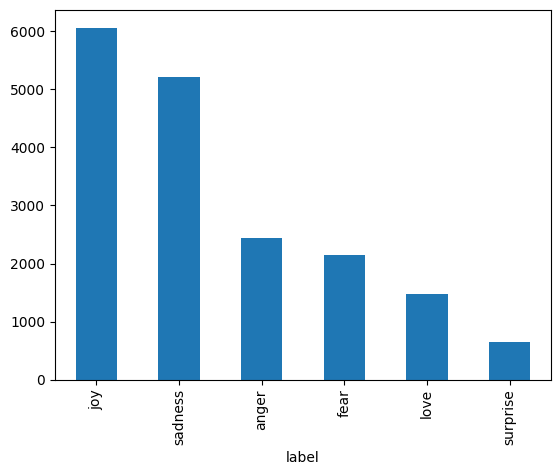

In [11]:
#lets chcek the occurences of each class in the dataset
df.label.value_counts().plot.bar()


In [12]:
#classifying the label into +ve and -ve 
#+ve : Joy love surprise - 1
#-ve : Anger fear sadness - 0

In [13]:
#now replacing the labels with 0 and 1
df['label'].replace(to_replace=['joy', 'love', 'surprise'], value=1, inplace=True)
df['label'].replace(to_replace=['anger', 'fear', 'sadness'], value=0, inplace=True)

C:\Users\govin\AppData\Local\Temp\ipykernel_20192\4171738438.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['label'].replace(to_replace=['joy', 'love', 'surprise'], value=1, inplace=True)
C:\Users\govin\AppData\Local\Temp\ipykernel_20192\4171738438.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', 

In [14]:
df.head(5)

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0


<Axes: xlabel='label'>

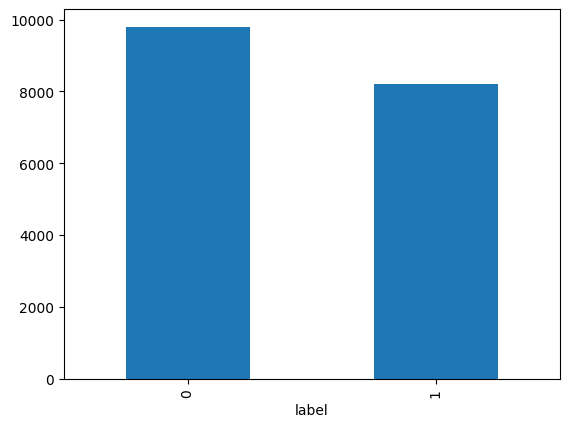

In [15]:
df.label.value_counts().plot.bar()

In [16]:
for i in df['text']:
    re.sub(r'@[A-Za-z0-9]+', '', i) #removing @mentions

In [17]:
lm = WordNetLemmatizer()

In [18]:
#Ater removing the stopwords, we will lemmatize the words
#lemmatization is a process replacing a word with its root or head word  called lemma
def transformation(df_column):
    output = []
    for i in df_column:
        new_text = re.sub(r'[^a-zA-Z]', ' ', str(i))
        new_text = new_text.lower()
        new_text = new_text.split()
        new_text = [lm.lemmatize(j) for j in new_text if j not in set(stopwords.words('english'))]
         
        output.append(' '.join(str(k) for k in new_text))
    return output
    

In [19]:
var = transformation(df.text)  

In [20]:
var

['didnt feel humiliated',
 'go feeling hopeless damned hopeful around someone care awake',
 'im grabbing minute post feel greedy wrong',
 'ever feeling nostalgic fireplace know still property',
 'feeling grouchy',
 'ive feeling little burdened lately wasnt sure',
 'ive taking milligram time recommended amount ive fallen asleep lot faster also feel like funny',
 'feel confused life teenager jaded year old man',
 'petronas year feel petronas performed well made huge profit',
 'feel romantic',
 'feel like make suffering seeing mean something',
 'feel running divine experience expect type spiritual encounter',
 'think easiest time year feel dissatisfied',
 'feel low energy thirsty',
 'immense sympathy general point possible proto writer trying find time write corner life sign agent let alone publishing contract feel little precious',
 'feel reassured anxiety side',
 'didnt really feel embarrassed',
 'feel pretty pathetic time',
 'started feeling sentimental doll child began collection vint

In [21]:
#lets plot a wordcloud to see the most frequent words in the dataset
plt.figure(figsize=(20, 8))
word = " "
for i in var:
    for j in i :
        word += " ".join(j)

print(word)

 didnt feel humiliatedgo feeling hopeless damned hopeful around someone care awakeim grabbing minute post feel greedy wrongever feeling nostalgic fireplace know still propertyfeeling grouchyive feeling little burdened lately wasnt sureive taking milligram time recommended amount ive fallen asleep lot faster also feel like funnyfeel confused life teenager jaded year old manpetronas year feel petronas performed well made huge profitfeel romanticfeel like make suffering seeing mean somethingfeel running divine experience expect type spiritual encounterthink easiest time year feel dissatisfiedfeel low energy thirstyimmense sympathy general point possible proto writer trying find time write corner life sign agent let alone publishing contract feel little preciousfeel reassured anxiety sidedidnt really feel embarrassedfeel pretty pathetic timestarted feeling sentimental doll child began collection vintage barbie doll sixtyfeel compromised skeptical value every unit work putfeel irritated rej

<Figure size 2000x800 with 0 Axes>

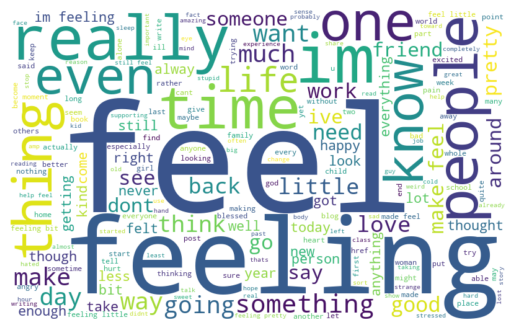

In [22]:
#we will use wordcloud to visualize the most frequent words in the dataset
photo = WordCloud(width = 800 , height= 500 , background_color='white', min_font_size=10).generate(word)
plt.imshow(photo , interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
#lets implemen bog(Bag of words) to convert the text into vectors
#we will use CountVectorizer to implement bag of words


In [24]:
#we will use ngram_range=(1,2) to get unigrams and bigrams
cv = CountVectorizer(ngram_range=(1, 2))
traindata = cv.fit_transform(var)

X_train = traindata
Y_train = df.label


In [25]:
model = RandomForestClassifier()

In [39]:
#hyper parameter tuning

parameters = {'max_features': ('auto', 'sqrt'),
              'n_estimators': [500, 1000],
              'max_depth': [5,10],
              'min_samples_leaf':[1,2,5,10],
              'min_samples_split':[2,5,10],
              'bootstrap':[True,False]
              
            }
              

In [40]:
gs = GridSearchCV(model,parameters,cv=5,return_train_score=True, n_jobs=-1)


In [41]:
gs.fit(X_train,Y_train)


c:\Users\govin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
345 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\govin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\govin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10],
                         'max_features': ('auto', 'sqrt'),
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [500, 1000]},
             return_train_score=True)

In [46]:
# Print the best parameters and best score
print("Best Parameters:", gs.best_params_)
print("Best Cross-Validation Score:", gs.best_score_)

Best Parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}
Best Cross-Validation Score: 0.5463636503967151


In [47]:
# Assuming you have X_test and Y_test
test_score = gs.score(X_train, Y_train)
print("Test Score:", test_score)

Test Score: 0.5452525140285571


In [48]:
from sklearn.metrics import classification_report

# Predictions on the test set
Y_pred = gs.predict(X_train)

# Generate classification report
print(classification_report(Y_train, Y_pred))

              precision    recall  f1-score   support

           0       0.54      1.00      0.71      9799
           1       1.00      0.00      0.00      8200

    accuracy                           0.55     17999
   macro avg       0.77      0.50      0.35     17999
weighted avg       0.75      0.55      0.39     17999



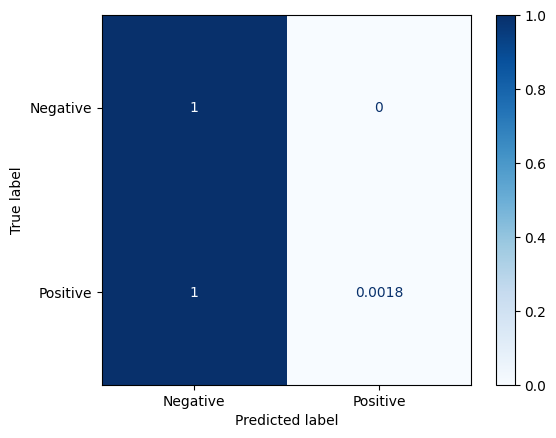

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay

# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(gs, X_train, Y_train, display_labels=['Negative', 'Positive'], cmap=plt.cm.Blues, normalize='true')
plt.show()